# Building Complex Models Using the Functional API

In [1]:
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np, pandas as pd
import keras
import time

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [3]:
housing = fetch_california_housing()
# print(housing)

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target, random_state=42)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [8]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [9]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

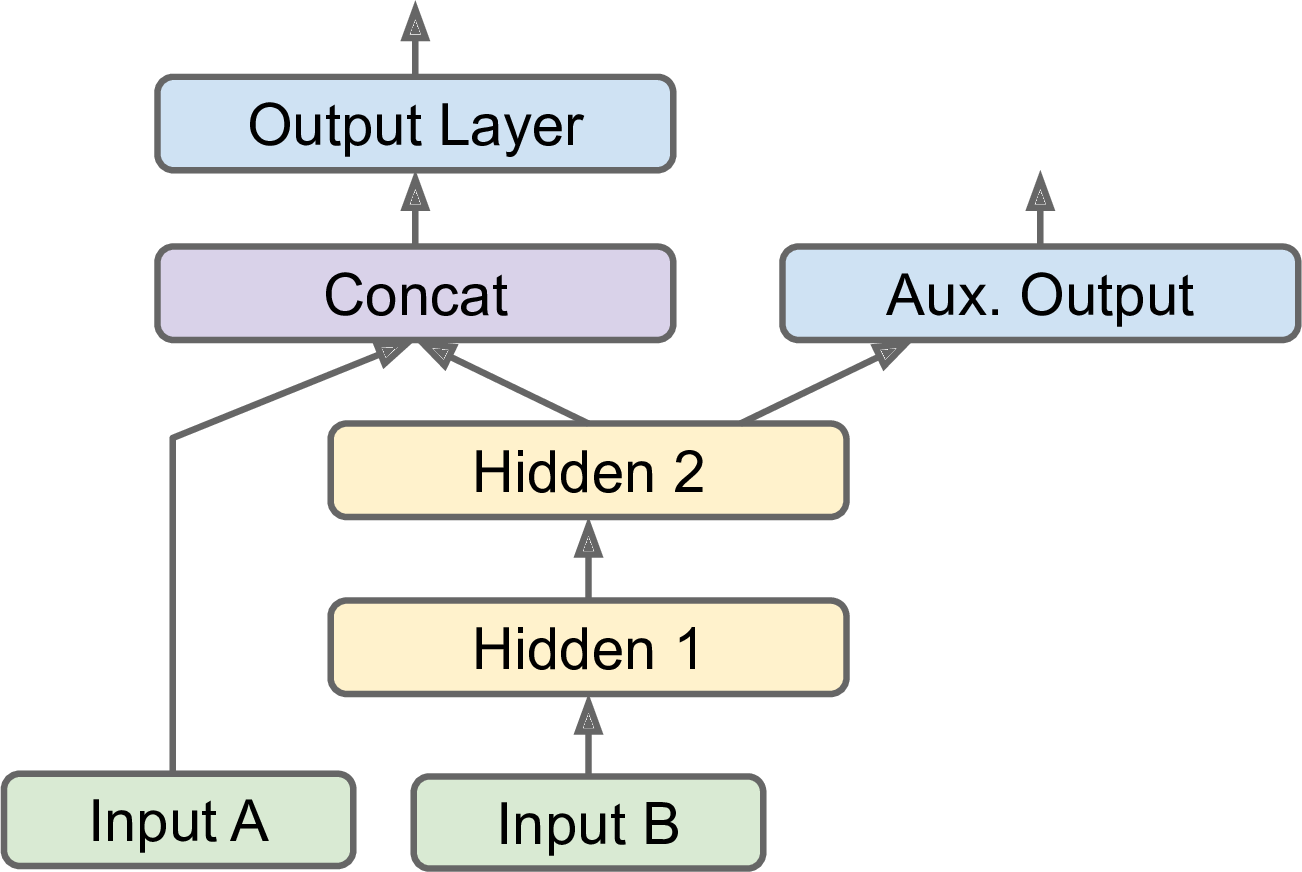

In [10]:
history = model.fit(
                    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20


363/363 [==============================] - 2s 4ms/step - loss: 1.0603 - main_output_loss: 0.9500 - aux_output_loss: 2.0530 - val_loss: 0.5921 - val_main_output_loss: 0.5416 - val_aux_output_loss: 1.0469
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5473 - main_output_loss: 0.5047 - aux_output_loss: 0.9315 - val_loss: 0.4930 - val_main_output_loss: 0.4537 - val_aux_output_loss: 0.8473
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6840 - main_output_loss: 0.6548 - aux_output_loss: 0.9471 - val_loss: 0.5490 - val_main_output_loss: 0.5052 - val_aux_output_loss: 0.9431
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5103 - main_output_loss: 0.4737 - aux_output_loss: 0.8398 - val_loss: 0.4588 - val_main_output_loss: 0.4262 - val_aux_output_loss: 0.7517
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4700 - main_output_loss: 0.4424 - aux_output_loss: 0.7184 - val_lo

In [11]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3629 - main_output_loss: 0.3517 - aux_output_loss: 0.4636


In [12]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] # pretend these are new instances
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 122ms/step


In [13]:
y_pred

[array([[0.4003166],
        [1.3862412],
        [3.6779327]], dtype=float32),
 array([[0.7489238],
        [1.8110867],
        [3.1259575]], dtype=float32)]

In [14]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

In [15]:
mse(y_pred[0], y_test[:3])

0.8718001162372704

In [16]:
mse(y_pred[1], y_test[:3])

1.805619616764558

In [17]:
model.evaluate((X_new_A, X_new_B), y_test[:3])

1/1 [==============================] - 0s 36ms/step - loss: 0.9652 - main_output_loss: 0.8718 - aux_output_loss: 1.8056


[0.9651820659637451, 0.8718001246452332, 1.805619716644287]

In [18]:
model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 31ms/step


[array([[0.4003166],
        [1.3862412],
        [3.6779327]], dtype=float32),
 array([[0.7489238],
        [1.8110867],
        [3.1259575]], dtype=float32)]

In [19]:
mse(model.predict((X_new_A, X_new_B))[0], y_test[:3])

1/1 [==============================] - 0s 31ms/step


0.8718001162372704

In [20]:
mse(model.predict((X_new_A, X_new_B))[1], y_test[:3])

1/1 [==============================] - 0s 25ms/step


1.805619616764558

# Saving and Restoring a Model

In [21]:
model.save("6_my_keras_model.keras")

In [22]:
loaded_model = keras.models.load_model("6_my_keras_model.keras")

In [23]:
from datetime import datetime
from time import strftime, localtime

In [24]:
datetime.now().strftime('%d-%b-%Y %I:%M %p')

'05-Dec-2023 11:07 PM'

In [25]:
time.time()

1701797839.426238

In [26]:
strftime('%Y-%m-%d %H:%M:%S', localtime(time.time()))

'2023-12-05 23:07:19'